In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [2]:
#create set of random latitudes and longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#add the lat and lng to a list
coordinates = list(lat_lngs)

In [4]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each lat and lng combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If city is unique add to cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

624

In [5]:
#starting URL for Weather Map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
#testing URL and API call
boston_url = url + '&q=' + 'Boston'
boston_weather = requests.get(boston_url)
boston_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 38.91,
  'feels_like': 33.73,
  'temp_min': 35.35,
  'temp_max': 39.16,
  'pressure': 1011,
  'humidity': 44,
  'sea_level': 1011,
  'grnd_level': 1010},
 'visibility': 10000,
 'wind': {'speed': 7.16, 'deg': 241, 'gust': 11.83},
 'clouds': {'all': 96},
 'dt': 1638122455,
 'sys': {'type': 1,
  'id': 4210,
  'country': 'US',
  'sunrise': 1638100259,
  'sunset': 1638134042},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [7]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval")
print('-------------------------')

#Create counters
record_count = 1
set_count = 1

#loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    #add 1 to record count
    record_count += 1

# Run API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city informatino into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
#If an error occurs, skip the city
    except:
        print("City not found, Skipping...")
        pass

#Indicate the Data loading is complete
print("----------------------------")
print("Date Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | camana
Processing Record 3 of Set 1 | tabou
Processing Record 4 of Set 1 | taolanaro
City not found, Skipping...
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | birobidzhan
Processing Record 8 of Set 1 | nanortalik
Processing Record 9 of Set 1 | jiazi
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | siniscola
Processing Record 12 of Set 1 | farafangana
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | kaeo
Processing Record 17 of Set 1 | batagay-alyta
Processing Record 18 of Set 1 | malwan
City not found, Skipping...
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | nhulunbuy
Processing Record 22 of Set 1 | panga

Processing Record 41 of Set 4 | laguna
Processing Record 42 of Set 4 | tuktoyaktuk
Processing Record 43 of Set 4 | yanam
Processing Record 44 of Set 4 | pushkino
Processing Record 45 of Set 4 | grindavik
Processing Record 46 of Set 4 | steinheim
Processing Record 47 of Set 4 | chipinge
Processing Record 48 of Set 4 | kabanjahe
Processing Record 49 of Set 4 | mount isa
Processing Record 50 of Set 4 | the valley
Processing Record 1 of Set 5 | hay river
Processing Record 2 of Set 5 | obo
Processing Record 3 of Set 5 | hofn
Processing Record 4 of Set 5 | port lincoln
Processing Record 5 of Set 5 | uppsala
Processing Record 6 of Set 5 | honningsvag
Processing Record 7 of Set 5 | nizwa
Processing Record 8 of Set 5 | heide
Processing Record 9 of Set 5 | viking
Processing Record 10 of Set 5 | guerrero negro
Processing Record 11 of Set 5 | clarksville
Processing Record 12 of Set 5 | samusu
City not found, Skipping...
Processing Record 13 of Set 5 | sawai madhopur
Processing Record 14 of Set 5 |

Processing Record 27 of Set 8 | millington
Processing Record 28 of Set 8 | komsomolskiy
Processing Record 29 of Set 8 | ozgon
City not found, Skipping...
Processing Record 30 of Set 8 | saint pete beach
Processing Record 31 of Set 8 | dossor
Processing Record 32 of Set 8 | nisia floresta
Processing Record 33 of Set 8 | meulaboh
Processing Record 34 of Set 8 | wa
City not found, Skipping...
Processing Record 35 of Set 8 | sao joao evangelista
Processing Record 36 of Set 8 | parainen
Processing Record 37 of Set 8 | anadyr
Processing Record 38 of Set 8 | desbiens
Processing Record 39 of Set 8 | surt
Processing Record 40 of Set 8 | sao joao da barra
Processing Record 41 of Set 8 | yauya
Processing Record 42 of Set 8 | arraial do cabo
Processing Record 43 of Set 8 | chastyye
Processing Record 44 of Set 8 | correntina
Processing Record 45 of Set 8 | hlotse
Processing Record 46 of Set 8 | urumqi
Processing Record 47 of Set 8 | vila velha
Processing Record 48 of Set 8 | sao miguel do tapuio
Pr

Processing Record 14 of Set 12 | anaconda
Processing Record 15 of Set 12 | phan rang
City not found, Skipping...
Processing Record 16 of Set 12 | vetluzhskiy
Processing Record 17 of Set 12 | stykkisholmur
Processing Record 18 of Set 12 | harer
Processing Record 19 of Set 12 | formoso do araguaia
City not found, Skipping...
Processing Record 20 of Set 12 | princeton
Processing Record 21 of Set 12 | taksimo
Processing Record 22 of Set 12 | natal
Processing Record 23 of Set 12 | vetapalem
Processing Record 24 of Set 12 | kota belud
Processing Record 25 of Set 12 | chumikan
Processing Record 26 of Set 12 | minab
Processing Record 27 of Set 12 | likasi
Processing Record 28 of Set 12 | warqla
City not found, Skipping...
Processing Record 29 of Set 12 | horsham
Processing Record 30 of Set 12 | hamilton
Processing Record 31 of Set 12 | lincoln
Processing Record 32 of Set 12 | boyolangu
Processing Record 33 of Set 12 | calama
Processing Record 34 of Set 12 | broken hill
Processing Record 35 of 

In [8]:
len(city_data)

570

In [9]:
#Convert the array of dictionaries to a DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,51.21,51,58,14.94,AR,2021-11-28 18:10:57
1,Camana,-16.6228,-72.7111,70.12,75,68,9.53,PE,2021-11-28 18:11:13
2,Tabou,4.4230,-7.3528,80.20,79,55,5.37,CI,2021-11-28 18:11:14
3,Souillac,-20.5167,57.5167,77.38,78,20,4.61,MU,2021-11-28 18:11:14
4,Hermanus,-34.4187,19.2345,64.60,83,47,10.16,ZA,2021-11-28 18:11:14
5,Birobidzhan,48.8000,132.9500,20.17,96,100,3.78,RU,2021-11-28 18:11:15
6,Nanortalik,60.1432,-45.2371,41.99,91,100,14.94,GL,2021-11-28 18:11:15
7,Jiazi,22.8779,116.0670,66.20,86,14,10.31,CN,2021-11-28 18:11:15
8,Kapaa,22.0752,-159.3190,71.92,78,20,5.75,US,2021-11-28 18:11:15
9,Siniscola,40.5719,9.6922,45.95,60,27,17.83,IT,2021-11-28 18:11:16


In [11]:
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-11-28 18:10:57,-54.8000,-68.3000,51.21,51,58,14.94
1,Camana,PE,2021-11-28 18:11:13,-16.6228,-72.7111,70.12,75,68,9.53
2,Tabou,CI,2021-11-28 18:11:14,4.4230,-7.3528,80.20,79,55,5.37
3,Souillac,MU,2021-11-28 18:11:14,-20.5167,57.5167,77.38,78,20,4.61
4,Hermanus,ZA,2021-11-28 18:11:14,-34.4187,19.2345,64.60,83,47,10.16
5,Birobidzhan,RU,2021-11-28 18:11:15,48.8000,132.9500,20.17,96,100,3.78
6,Nanortalik,GL,2021-11-28 18:11:15,60.1432,-45.2371,41.99,91,100,14.94
7,Jiazi,CN,2021-11-28 18:11:15,22.8779,116.0670,66.20,86,14,10.31
8,Kapaa,US,2021-11-28 18:11:15,22.0752,-159.3190,71.92,78,20,5.75
9,Siniscola,IT,2021-11-28 18:11:16,40.5719,9.6922,45.95,60,27,17.83


In [13]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the city_data into CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

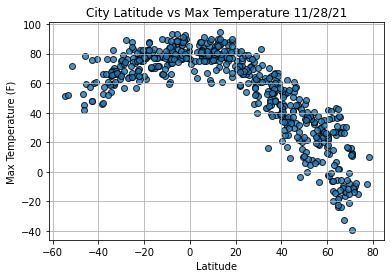

In [19]:
#Import time codule
import time

#Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black",
           linewidth=1,
           marker='o',
           alpha=0.8,
           label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature " + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#Save figure
plt.savefig('weather_data/Fig1.png')

#show plot
plt.show()

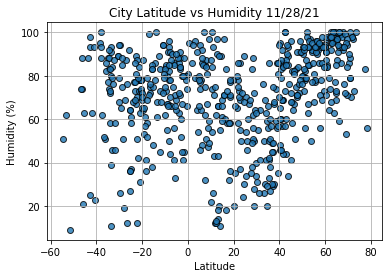

In [20]:
#Build the scatter plot for latitude vs Humidity
plt.scatter(lats,
           humidity,
           edgecolor="black",
           linewidth=1,
           marker='o',
           alpha=0.8,
           label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity " + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save figure
plt.savefig('weather_data/Fig2.png')

#show plot
plt.show()

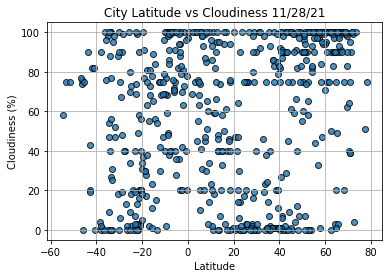

In [21]:
#Build the scatter plot for Latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black",
           linewidth=1,
           marker='o',
           alpha=0.8,
           label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness " + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save figure
plt.savefig('weather_data/Fig3.png')

#show plot
plt.show()

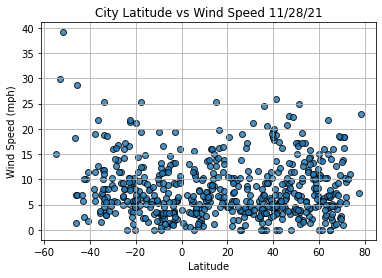

In [22]:
#Build the scatter plot for latitude vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black",
           linewidth=1,
           marker='o',
           alpha=0.8,
           label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed " + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#Save figure
plt.savefig('weather_data/Fig4.png')

#show plot
plt.show()